In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit, glob
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns


from statannot import add_stat_annotation



In [16]:
a = glob.glob(r"C:\Project\master-project\results2\*_4.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_5.xlsx")
df_all_1 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_1 = df_all_1.append(e)
df_all_1.drop("Unnamed: 0",  axis=1, inplace=True)

print(df_all_1.shape)
df_all_1["acc"] = [eval(df_all_1.iloc[i,14])["accuracy"]*100 for i in range(df_all_1.shape[0]) ]
df_all_1

a = glob.glob(r"C:\Project\master-project\results2\*_8.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_9.xlsx")
c = glob.glob(r"C:\Project\master-project\results2\*_10.xlsx")
df_all_2 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b+c):
    e = pd.read_excel(i)
    df_all_2 = df_all_2.append(e)

df_all_2.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_2.shape)
df_all_1.head()



(340, 17)
(6480, 219)


,testID,subject ID,direction,clasifier,f1score_test,f1score_train,f1score_val,classifier_parameters,feature_type,test_ratio,val_ratio,train_split,train,val,test,save_path,tensorboard,acc
0,7651,0,Both,End-to-end,1.000000,1.000000,1.000000,"{'dataset': 'casia', 'train_sample': 2, 'base_...",PTI_FS,0.1,0.2,0.99,"{'loss': 0.01565796136856079, 'tp': 22.0, 'fp'...","{'loss': 0.015864934772253036, 'tp': 5.0, 'fp'...","{'loss': 0.016307810321450233, 'tp': 3.0, 'fp'...",./results/deep_model/Mode_4/FS_PTI_0.1_0.99/23...,/project/6010852/saeed67/master-project/logs/T...,100.000000
1,7650,1,Both,End-to-end,0.769231,1.000000,0.952381,"{'dataset': 'casia', 'train_sample': 2, 'base_...",PTI_FS,0.1,0.2,0.99,"{'loss': 0.020026104524731636, 'tp': 39.0, 'fp...","{'loss': 0.024164149537682533, 'tp': 10.0, 'fp...","{'loss': 0.042196787893772125, 'tp': 5.0, 'fp'...",./results/deep_model/Mode_4/FS_PTI_0.1_0.99/23...,/project/6010852/saeed67/master-project/logs/T...,98.951048
2,7772,2,Both,End-to-end,1.000000,1.000000,0.782609,"{'dataset': 'casia', 'train_sample': 2, 'base_...",PTI_FS,0.1,0.2,0.99,"{'loss': 0.028124919161200523, 'tp': 38.0, 'fp...","{'loss': 0.08702189475297928, 'tp': 9.0, 'fp':...","{'loss': 0.029559902846813202, 'tp': 5.0, 'fp'...",./results/deep_model/Mode_4/FS_PTI_0.1_0.99/23...,/project/6010852/saeed67/master-project/logs/T...,100.000000
3,7648,3,Both,End-to-end,0.750000,0.977778,0.615385,"{'dataset': 'casia', 'train_sample': 2, 'base_...",PTI_FS,0.1,0.2,0.99,"{'loss': 0.023370664566755295, 'tp': 22.0, 'fp...","{'loss': 0.06395808607339859, 'tp': 4.0, 'fp':...","{'loss': 0.039783596992492676, 'tp': 3.0, 'fp'...",./results/deep_model/Mode_4/FS_PTI_0.1_0.99/23...,/project/6010852/saeed67/master-project/logs/T...,99.300700
4,7649,4,Both,End-to-end,1.000000,1.000000,0.909091,"{'dataset': 'casia', 'train_sample': 2, 'base_...",PTI_FS,0.1,0.2,0.99,"{'loss': 0.019358845427632332, 'tp': 22.0, 'fp...","{'loss': 0.028150098398327827, 'tp': 5.0, 'fp'...","{'loss': 0.020830372348427773, 'tp': 3.0, 'fp'...",./results/deep_model/Mode_4/FS_PTI_0.1_0.99/23...,/project/6010852/saeed67/master-project/logs/T...,100.000000


Text(0, 0.5, 'mean(acc)')

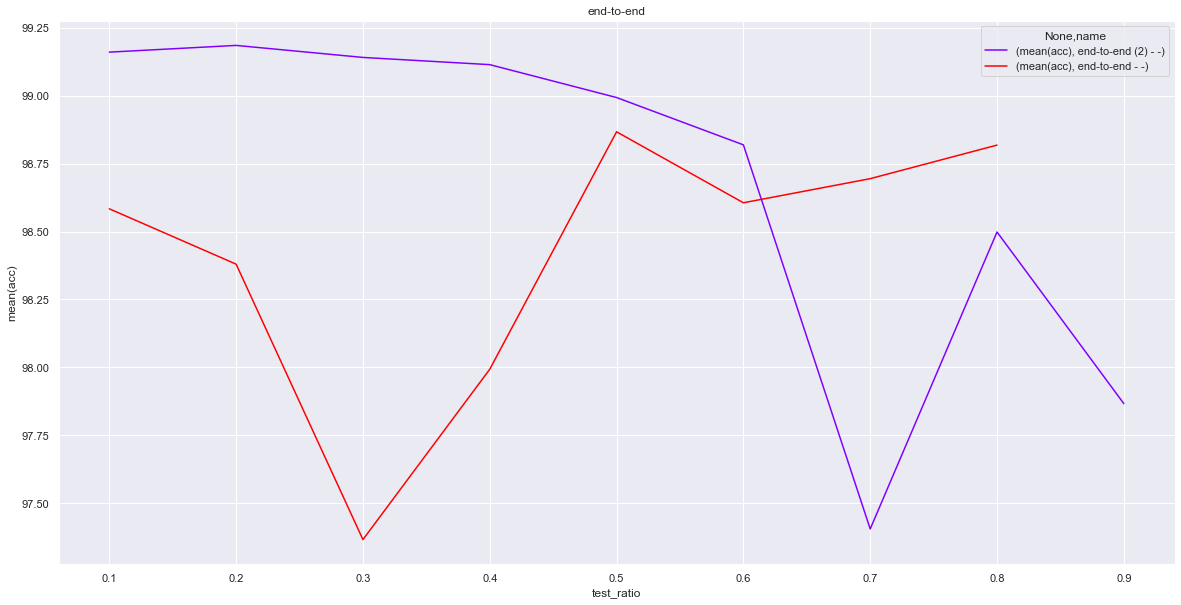

In [28]:
b = "mean(acc)"
a="end-to-end"


df2 = df_all_2[[b, "clasifier", "feature_type", "test_ratio"]]
df1 = df_all_1[["acc", "clasifier", "feature_type", "test_ratio"]]

df1.columns = [b, "clasifier", "feature_type", "test_ratio"]
# df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)

df = df1.append(df2)
df["feature_type"] = df["feature_type"].map(lambda x: "image" if x=="image_PTI_FT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "custom CNN" if x=="resnet50_PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "vgg16" if x=="vgg16_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "efficientnet" if x=="efficientnet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "resnet50" if x=="resnet50_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "mobilene" if x=="mobilenet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end" if x=="PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end (2)" if x=="CD PTI P100_FS" else x)
df["clasifier"] = df["clasifier"].map(lambda x: "-" if x=="End-to-end" else x)

df["name"] = df["feature_type"] + " - " + df["clasifier"]#.map(lambda x: "-" if x=="End-to-end" else x)
df1 = df[df["clasifier"]=='-']
df1.drop(["clasifier", "feature_type"], axis=1)
dfg = df1.groupby(['test_ratio', 'name']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title(a)
plt.ylabel(b)

In [88]:
a = glob.glob(r"C:\Project\master-project\results2\*_4.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_5.xlsx")
df_all_1 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_1 = df_all_1.append(e)
df_all_1.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_1.shape)
df_all_1.head()

a = glob.glob(r"C:\Project\master-project\results2\*_8.xlsx")
b = glob.glob(r"C:\Project\master-project\results2\*_9.xlsx")
c = glob.glob(r"C:\Project\master-project\results2\*_10.xlsx")
df_all_2 = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a+b+c):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all_2 = df_all_2.append(e)
df_all_2.drop("Unnamed: 0",  axis=1, inplace=True)
print(df_all_2.shape)
df_all_2.head()


(1600, 229)
(6480, 219)


,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1


C:\Users\skazemi1\AppData\Local\Temp/ipykernel_5060/2794923903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)


Text(0, 0.5, 'f1-score(%)')

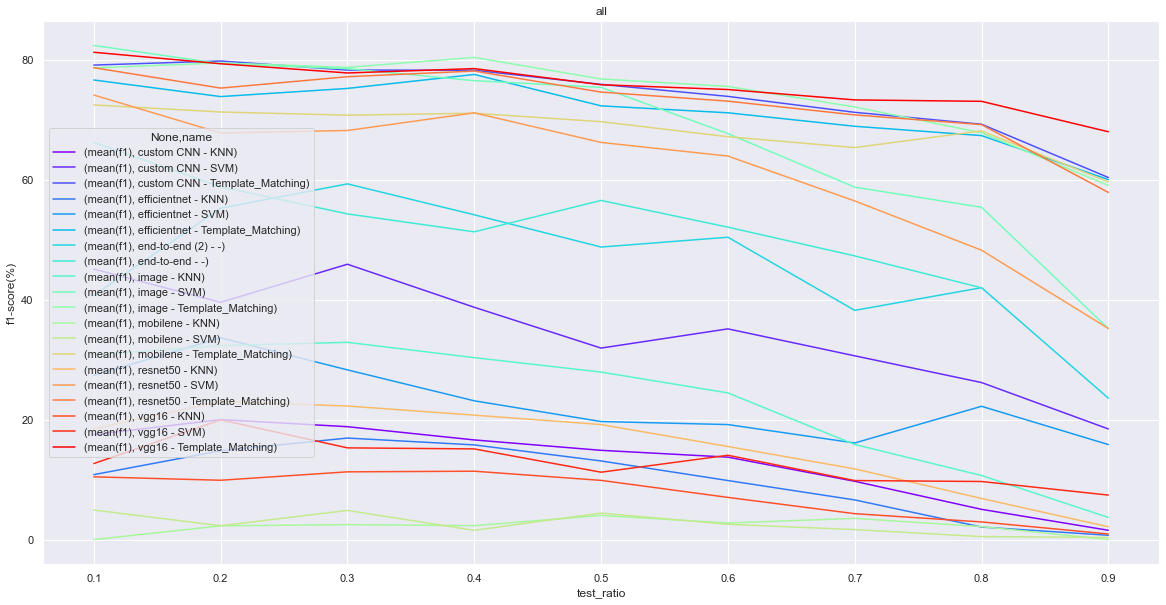

In [163]:
df2 = df_all_2[["mean(f1)", "clasifier", "feature_type", "test_ratio"]]
df1 = df_all_1[["f1score_test", "clasifier", "feature_type", "test_ratio"]]

df1.columns = ["mean(f1)", "clasifier", "feature_type", "test_ratio"]
df1["mean(f1)"] = df1["mean(f1)"].map(lambda x: x*100)

df = df1.append(df2)
df["feature_type"] = df["feature_type"].map(lambda x: "image" if x=="image_PTI_FT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "custom CNN" if x=="resnet50_PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "vgg16" if x=="vgg16_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "efficientnet" if x=="efficientnet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "resnet50" if x=="resnet50_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "mobilene" if x=="mobilenet_PTI_PT" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end" if x=="PTI_FS" else x)
df["feature_type"] = df["feature_type"].map(lambda x: "end-to-end (2)" if x=="CD PTI P100_FS" else x)
df["clasifier"] = df["clasifier"].map(lambda x: "-" if x=="End-to-end" else x)

df["name"] = df["feature_type"] + " - " + df["clasifier"]#.map(lambda x: "-" if x=="End-to-end" else x)
a="all"
df1 = df#[df["clasifier"]=="-"]
df1.drop(["clasifier", "feature_type"], axis=1)
dfg = df1.groupby(['test_ratio', 'name']).mean()
#plot()
# print(dfg)
sns.set()
sns.color_palette("Blues")
dfg.unstack().plot(figsize=(20,10), cmap="rainbow")
plt.title(a)
plt.ylabel("f1-score(%)")

#p', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
# 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
# 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
# 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
# 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
# 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
# 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
#  'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
# 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 
# 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
# summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
# 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [47]:
a = glob.glob(r"C:\Project\master-project\results\8*.xlsx")
df_all = pd.DataFrame()
# z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
# z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a):

    e = pd.read_excel(i)
    # e["train_split"]=1-z[ind]
    df_all = df_all.append(e)
df_all.drop("Unnamed: 0",  axis=1, inplace=True)
df_all.head()

,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1


In [46]:
df_all


,testID,subject ID,direction,clasifier,PCA,num_pc,classifier_parameters,normilizing,feature_type,test_ratio,...,FRR_90,FRR_91,FRR_92,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99
0,6169072,4,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
1,6169072,4,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
2,6169072,5,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
3,6169072,5,right_1,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
4,6169072,6,left_0,Template_Matching,0.95,6,"{'mode': 'dist', 'criteria': 'min', 'random_ru...",z-score,vgg16_PTI_PT,0.1,...,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,6169072,21,right_1,SVM,0.95,26,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
36,6169072,22,left_0,SVM,0.95,27,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
37,6169072,22,right_1,SVM,0.95,27,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
38,6169072,24,left_0,SVM,0.95,25,"{'kernel': 'linear', 'random_runs': 50, 'verbo...",z-score,resnet50_PTI_PT,0.9,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


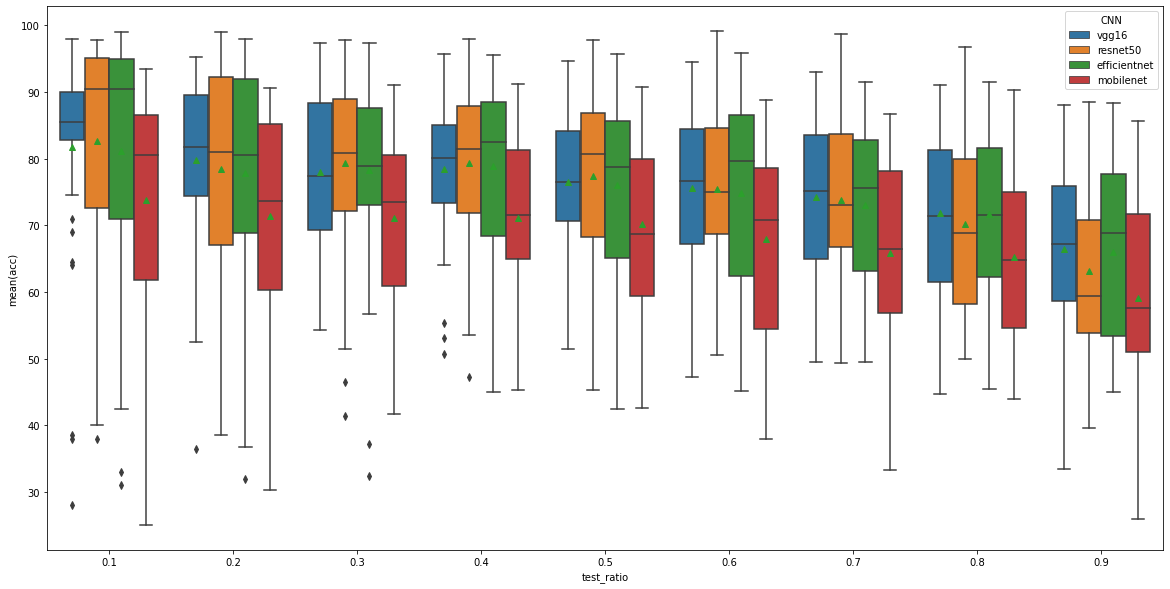

In [55]:
data = df_all
data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
# data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )
data = data[data["clasifier"]=="Template_Matching"]
y = "f1score_test"
y = "mean(acc)"

x = "test_ratio"# train_split test_ratio"
hue = "CNN"
box_pairs=[
    (0.1, 0.2),
    (0.1, 0.3),
    (0.7, 0.6),
    (0.9, 0.8),
    (0.7, 0.8),
    ]

plt.figure(figsize=(20,10))
# plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [6]:
a = glob.glob(r"C:\Users\skazemi1\Desktop\e1\*.xlsx")
df_all = pd.DataFrame()
z = [0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.25, 0.25, 0.3, 0.3, 0.35, 0.35, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8]
z = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.8]
for ind, i in enumerate(a):

    e = pd.read_excel(i)
    e["train_split"]=1-z[ind]
    df_all = df_all.append(e)
df_all

,Unnamed: 0,testID,subject ID,direction,clasifier,f1score_test,f1score_train,f1score_val,classifier_parameters,feature_type,test_ratio,val_ratio,train,val,test,save_path,tensorboard,train_split
0,0,8897,0,Both,End-to-end,0.235294,0.333333,0.470588,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.4248168468475342, 'tp': 16.0, 'fp':...","{'loss': 0.43575388193130493, 'tp': 4.0, 'fp':...","{'loss': 0.4244650900363922, 'tp': 2.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_0_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
1,1,8912,1,Both,End-to-end,0.571429,0.615385,0.666667,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.24983572959899902, 'tp': 16.0, 'fp'...","{'loss': 0.24928255379199982, 'tp': 5.0, 'fp':...","{'loss': 0.24688629806041718, 'tp': 2.0, 'fp':...",./results/deep_model/FS_PTI_0.1/22838820_1_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
2,2,8888,2,Both,End-to-end,1.000000,0.875000,0.842105,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.06543152034282684, 'tp': 28.0, 'fp'...","{'loss': 0.11185712367296219, 'tp': 8.0, 'fp':...","{'loss': 0.05873316153883934, 'tp': 5.0, 'fp':...",./results/deep_model/FS_PTI_0.1/22838820_2_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
3,3,9029,3,Both,End-to-end,0.545455,0.740741,0.555556,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.07520745694637299, 'tp': 20.0, 'fp'...","{'loss': 0.08915271610021591, 'tp': 5.0, 'fp':...","{'loss': 0.1000903770327568, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_3_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
4,4,9900,4,Both,End-to-end,0.285714,0.461538,0.333333,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.11620134860277176, 'tp': 18.0, 'fp'...","{'loss': 0.14253145456314087, 'tp': 4.0, 'fp':...","{'loss': 0.1213371679186821, 'tp': 2.0, 'fp': ...",./results/deep_model/FS_PTI_0.1/22838820_4_bes...,/project/6010852/saeed67/master-project/logs/T...,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,8888,15,Both,End-to-end,0.333333,0.461538,0.133333,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.5114799737930298, 'tp': 3.0, 'fp': ...","{'loss': 0.5157889127731323, 'tp': 1.0, 'fp': ...","{'loss': 0.5000433921813965, 'tp': 1.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_15_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
16,16,8897,16,Both,End-to-end,0.037037,0.037559,0.028674,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.7413118481636047, 'tp': 4.0, 'fp': ...","{'loss': 0.7430834770202637, 'tp': 4.0, 'fp': ...","{'loss': 0.7436287999153137, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_16_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
17,17,8913,17,Both,End-to-end,0.142857,0.064516,0.153846,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.6863580346107483, 'tp': 1.0, 'fp': ...","{'loss': 0.6884788274765015, 'tp': 3.0, 'fp': ...","{'loss': 0.6869836449623108, 'tp': 1.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_17_be...,/project/6010852/saeed67/master-project/logs/T...,0.2
18,18,7623,18,Both,End-to-end,0.041958,0.037736,0.038168,"{'dataset': 'casia', 'train_sample': 2, 'base_...",CD PTI P100_FS,0.1,0.2,"{'loss': 0.7999887466430664, 'tp': 4.0, 'fp': ...","{'loss': 0.8035144209861755, 'tp': 5.0, 'fp': ...","{'loss': 0.7747525572776794, 'tp': 3.0, 'fp': ...",./results/deep_model/FS_PTI_0.8/22838820_18_be...,/project/6010852/saeed67/master-project/logs/T...,0.2


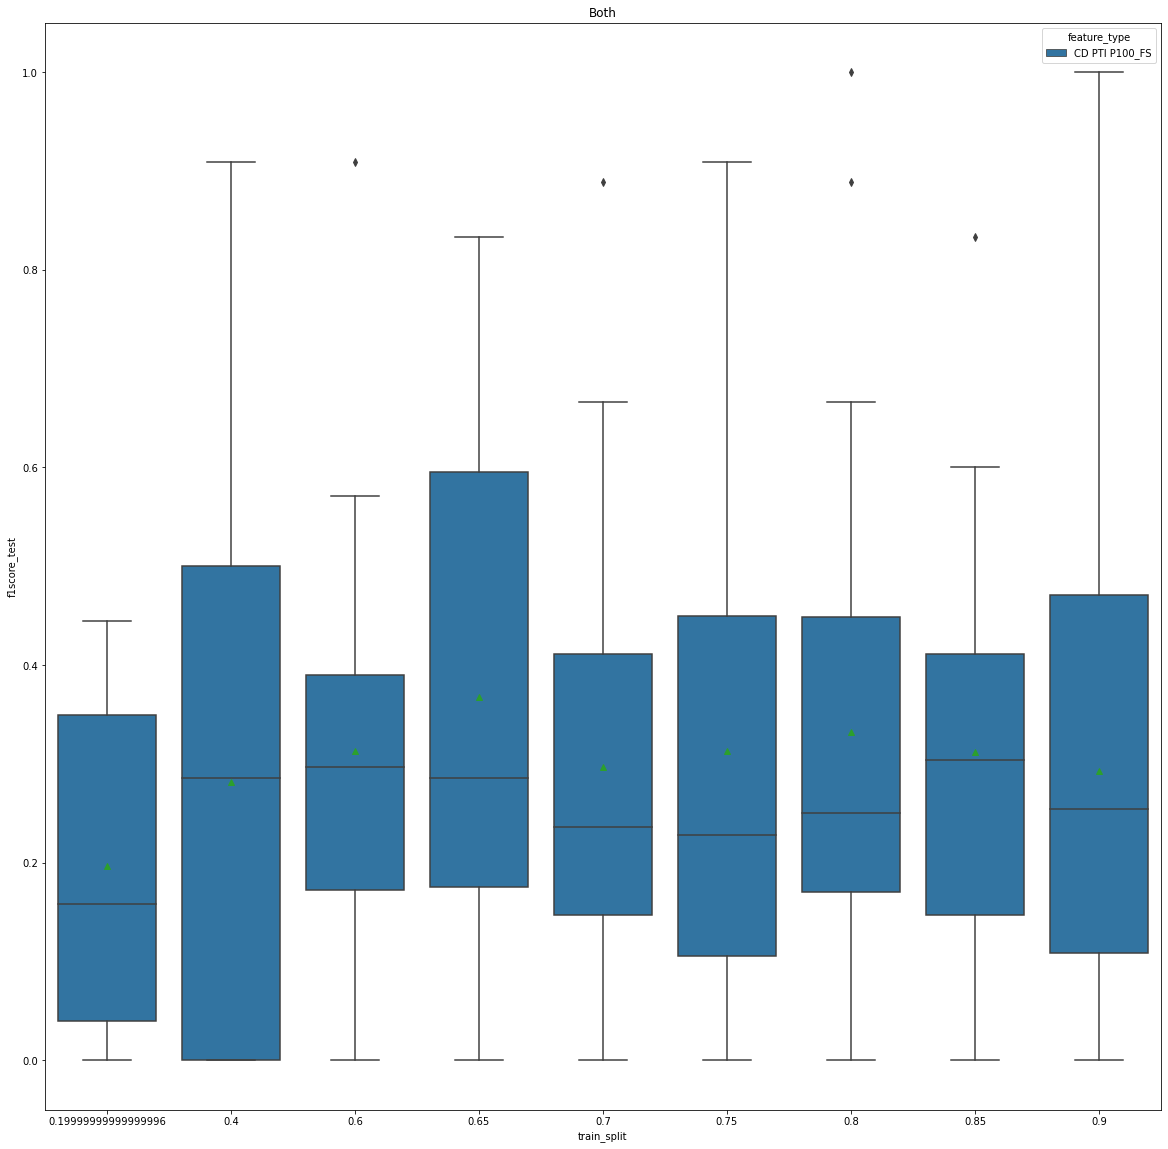

In [7]:

data = df_all
# data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
# data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )

y = "f1score_train"
y = "f1score_test"

x = "test_ratio"
x = "train_split"
hue = "feature_type"
# box_pairs=[
#     (("resnet50", "P100"), ("resnet50", "P90")),
#     ]

plt.figure(figsize=(20,20))
plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y, hue=hue, x=x, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [2]:
e1 = pd.read_excel(r"C:\Project\master-project\results\Result_all_4168.xlsx")
e2 = pd.read_excel(r"C:\Project\master-project\results\Result_all_15312.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
e2.drop("Unnamed: 0",  axis=1, inplace=True)
#e = pd.concat((e1, e2, e3), axis=0)
print(e1.shape)
#print(e.shape)
#e["CNN"] = e["feature_type"].map(lambda x: x.split("-")[0] )
#e["image_feature"] = e["feature_type"].map(lambda x: x.split("-")[1] )
#e.to_excel(r"C:\Project\master-project\results\Result_all.xlsx")


(128, 219)


In [ ]:
e1 = pd.read_excel(r"C:\Users\skazemi1\Desktop\1_a1.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
print(e1.shape)
e1

(120, 16)


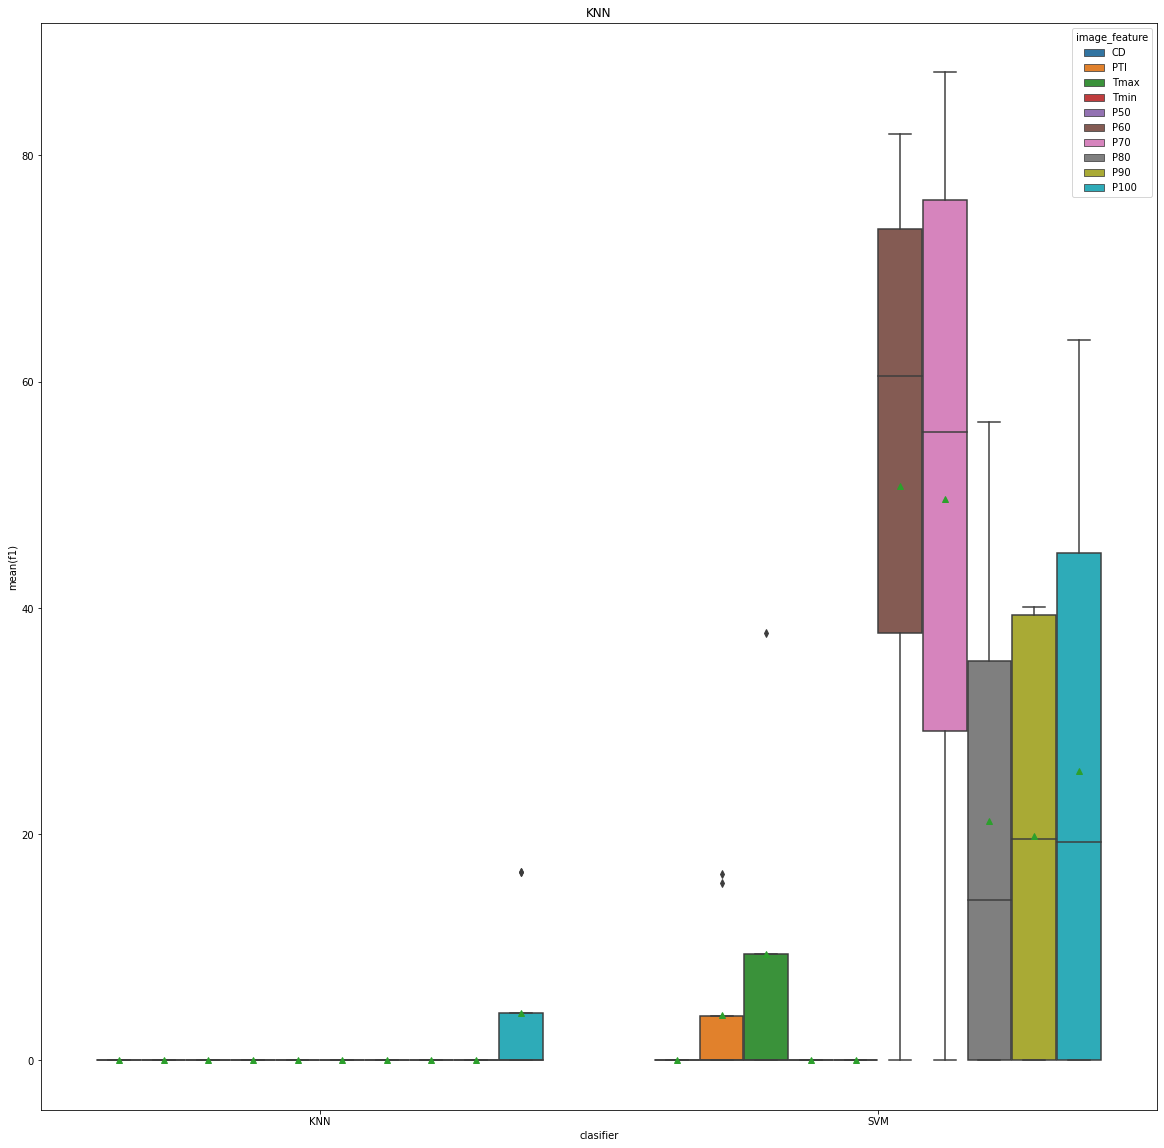

In [14]:
data = e1
data["CNN"] = data["feature_type"].map(lambda x: x.split("_")[0] )
data["image_feature"] = data["feature_type"].map(lambda x: x.split("_")[1] )

y = "mean(acc)"
y = "mean(f1)"

x = "clasifier"
hue = "image_feature"
# box_pairs=[
#     (("resnet50", "P100"), ("resnet50", "P90")),
#     ]

plt.figure(figsize=(20,20))
plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [15]:
e1 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101005.xlsx")
e2 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101006.xlsx")
e3 = pd.read_excel(r"C:\Project\master-project\good\Result_all_101040.xlsx")
e1.drop("Unnamed: 0",  axis=1, inplace=True)
e2.drop("Unnamed: 0",  axis=1, inplace=True)
e3.drop("Unnamed: 0",  axis=1, inplace=True)
#e = pd.concat((e1, e2, e3), axis=0)
print(e1.shape)
#print(e.shape)
#e["CNN"] = e["feature_type"].map(lambda x: x.split("-")[0] )
#e["image_feature"] = e["feature_type"].map(lambda x: x.split("-")[1] )
#e.to_excel(r"C:\Project\master-project\results\Result_all.xlsx")


(9600, 219)


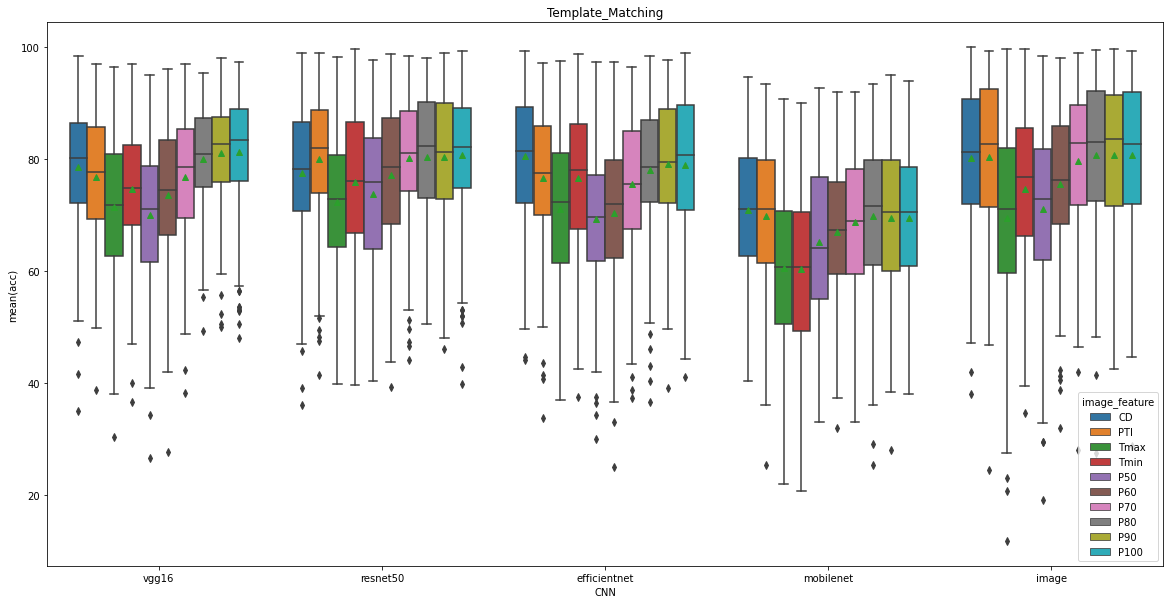

In [20]:
data = e3
data["CNN"] = data["feature_type"].map(lambda x: x.split("-")[0] )
data["image_feature"] = data["feature_type"].map(lambda x: x.split("-")[1] )

y = "mean(acc)"
# y = "mean(f1)"

x = "CNN"
hue = "image_feature"
# box_pairs=[
#     (("image", "P100"), ("image", "P90")),
#     ]

plt.figure(figsize=(20,10))
plt.title(data.iloc[1, 3])
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)

# add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
#                     box_pairs=box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

<AxesSubplot:xlabel='features'>

<Figure size 1440x1440 with 0 Axes>

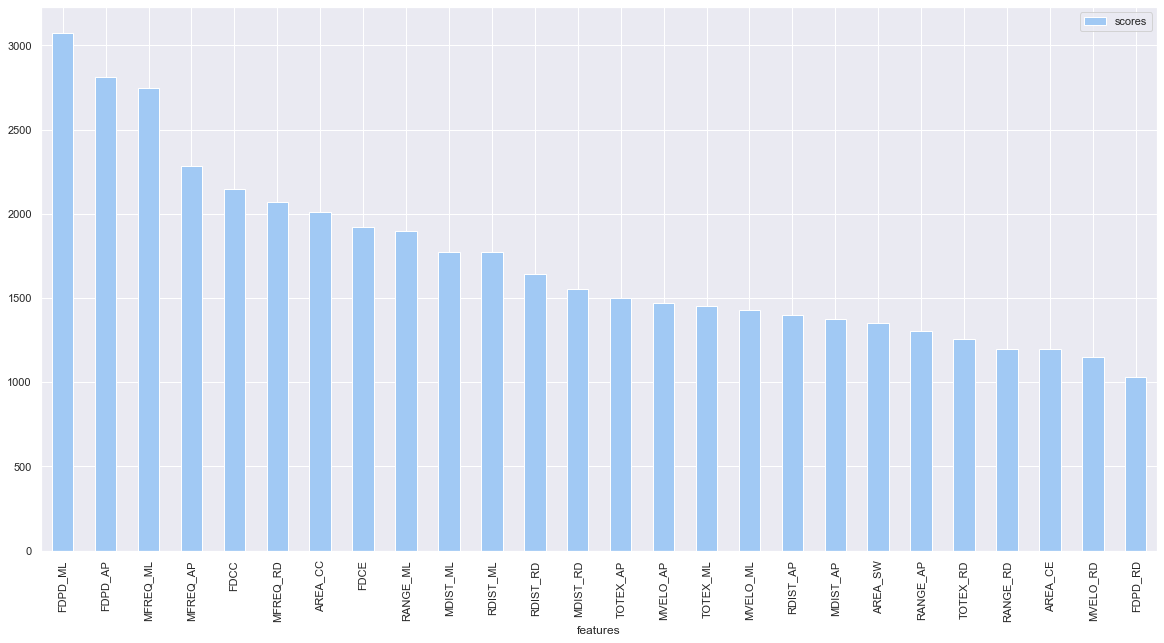

In [176]:
working_path = os.getcwd()
DF = pd.read_excel(os.path.join(working_path[:-5], "temp", "DF1.xlsx"))
DF.columns=["Rank", "D-prime", "F-ratio", "mRMR-Dif", "mRMR-Q", "Redundancy", "ID"]
DF

<AxesSubplot:xlabel='Count', ylabel='Redundancy'>

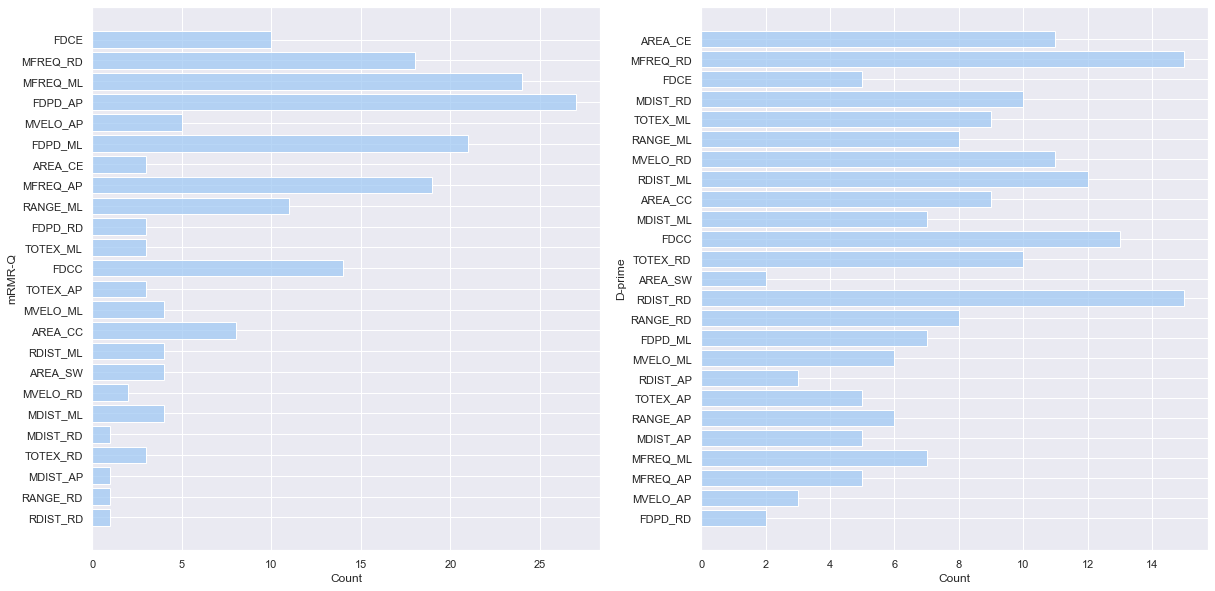

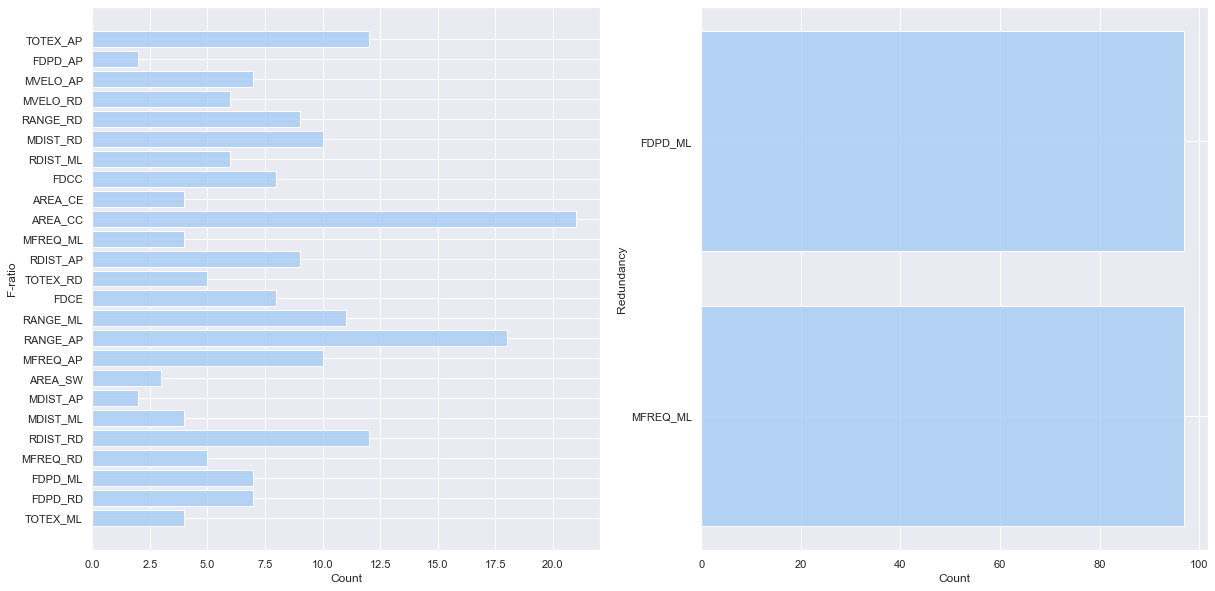

In [177]:
a = DF[ DF["Rank"]==1 ]
sns.set_palette("pastel")
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.histplot(data=a, y="mRMR-Q", stat="count", bins=26, shrink=.8, label="mRMR", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="D-prime", stat="count", bins=26, shrink=.8, label="D-prime", legend=True)
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
sns.histplot(data=a, y="F-ratio", stat="count", bins=26, shrink=.8, label="F-ratio", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="Redundancy", stat="count", bins=26, shrink=.8, label="Redundancy", legend=True)
# plt.legend(loc="best")



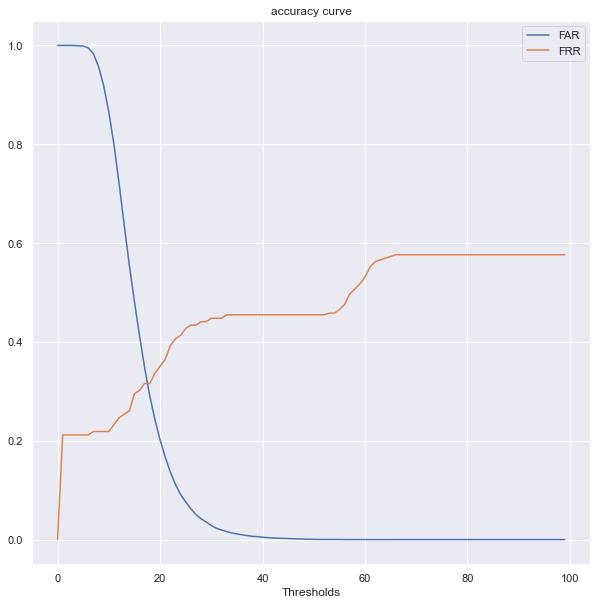

In [70]:
DD = pd.read_excel(os.path.join(working_path[:-5], "Archive", "results on testsize", "DF.xlsx"))
DD = DD[ DD["Test_Size"]== 0.9 ]
DD = DD[ DD["Mode"] == "dist"]
DD = DD.iloc[:, 26:].mean(axis=0)
a = ["FAR_L_"+str(i) for i in range(100)]
b = ["FRR_L_"+str(i) for i in range(100)]
sns.set()
plt.figure(figsize=(10,10))
plt.plot([i for i in range(100)], DD.loc[a], label="FAR")
plt.plot([i for i in range(100)], DD.loc[b], label="FRR")
plt.title("accuracy curve")
plt.xlabel("Thresholds")
plt.legend(loc="best")



     sub        acc   f1-score Normalization method
0      5  90.200000  91.484848              z-score
1      6  90.600000  92.081252              z-score
2      7  92.500000  93.296703              z-score
3      8  82.666667  86.261905              z-score
4      9  92.500000  93.644444              z-score
..   ...        ...        ...                  ...
762  100  84.000000  87.047619              z-score
763  101  79.250000  79.219048              z-score
764   94  67.000000  70.238961              z-score
765  102  70.333333  70.057143              z-score
766  103  78.250000  80.523478              z-score

[767 rows x 4 columns]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

z-score v.s. Minmax: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.652e-03 U_stat=8.159e+04


(<AxesSubplot:xlabel='Normalization method', ylabel='f1-score'>,
 [<statannot.StatResult.StatResult at 0x16b46951e20>])

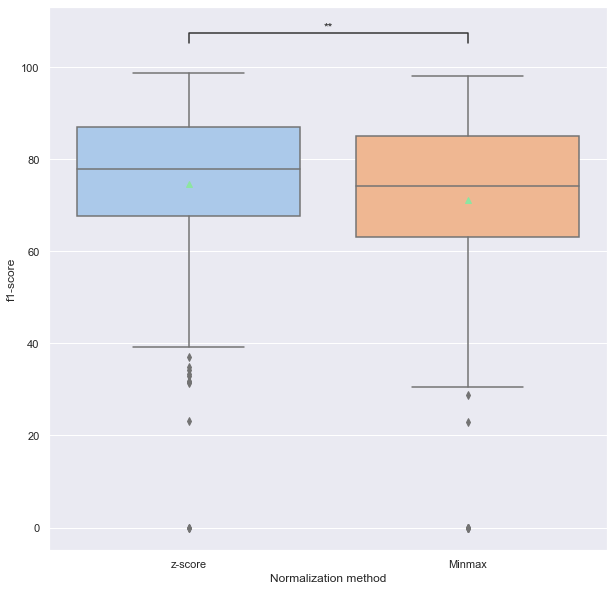

In [208]:
from statannot import add_stat_annotation

folder1 = "1.0_z-score_All_corr_min_0.0_None_2"
path = os.path.join(working_path[:-5], "Archive", "results on testsize", "DF1.xlsx")
Results_DF_1 = pd.read_excel(path, )
Results_DF_1.columns=["sub", "acc", "f1-score", "Normalization method"]
# Results_DF_1 = Results_DF_1[ Results_DF_1["feature type"] == "COP"]
print(Results_DF_1)

x = "Normalization method"
y = "acc"
y = "f1-score"
box_pairs=[

    ("Minmax", "z-score"),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=Results_DF_1, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=Results_DF_1, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.16))

In [240]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS3", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["Normalization method"] = foldername.split("_")[1]
    df["Criteria"] = foldername.split("_")[4]
    df["PCA"] = foldername.split("_")[0]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)

df_all

,subject ID,mean(acc),mean(f1),mean(eer),# positive samples training,# positive samples test,# negative samples test,test_ratio,EER,t_idx,...,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99,Normalization method,Criteria,PCA
0,4,53.600000,46.924387,0.464000,11,5,411,0.3,0.355455,75,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
1,5,81.200000,81.478788,0.188000,13,5,410,0.3,0.173846,78,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
2,6,84.200000,87.092241,0.158000,12,5,410,0.3,0.281667,76,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
3,7,74.666667,72.947319,0.253333,14,6,410,0.3,0.135714,72,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
4,8,48.666667,40.514286,0.513333,8,3,412,0.3,0.305000,73,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,100,83.333333,86.809524,0.166667,8,3,436,0.3,0.388750,26,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
92,101,75.750000,76.457143,0.242500,9,4,436,0.3,0.224444,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
93,94,80.250000,84.501010,0.197500,11,4,435,0.3,0.392727,22,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
94,102,68.666667,68.952381,0.313333,7,3,437,0.3,0.181429,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0


['0.8' '0.95' '0.9' '1.0']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

median v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.309e-17 U_stat=9.705e+05
average v.s. median: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.275e-03 U_stat=1.266e+06
average v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.933e-06 U_stat=1.062e+06


(<AxesSubplot:xlabel='Criteria', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x16b4aba07f0>])

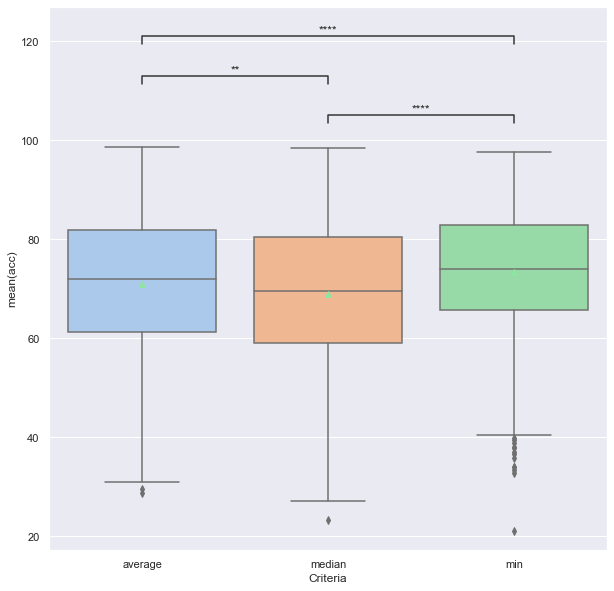

In [249]:

print(df_all["PCA"].unique())
x = "Normalization method"
x = "Criteria"
# x = "PCA"
y = "mean(acc)"
# y = "mean(f1)"
box_pairs=[

    # ("minmax", "z-score"),

    ("min", "average"),
    ("min", "median"),
    ("median", "average"),

    # ("1.0", "0.95"),
    # ("1.0", "0.9"),
    # ("1.0", "0.8"),
    # ("0.95", '0.9'),
    # ("0.95", "0.8"),
    # ("0.9", "0.8"),
    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=df_all, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [ ]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)



In [273]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "afeatures-simple", "**", "*.xlsx")
df_all_a = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all_a = df_all_a.append(df)



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.020e-51 U_stat=3.502e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.168e-03 U_stat=1.466e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.743e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.977e-22 U_stat=2.907e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.814e-08 U_stat=2.480e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.124e-01 U_stat=2.099e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b51275cd0>])

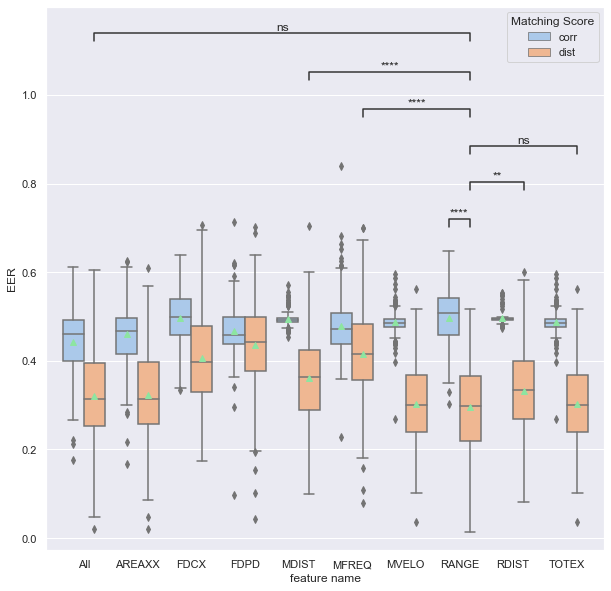

In [278]:

data = df_all
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.450e-53 U_stat=3.519e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.238e-02 U_stat=1.558e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.750e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.683e-16 U_stat=2.753e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.735e-06 U_stat=2.373e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.285e-01 U_stat=2.052e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b53643580>])

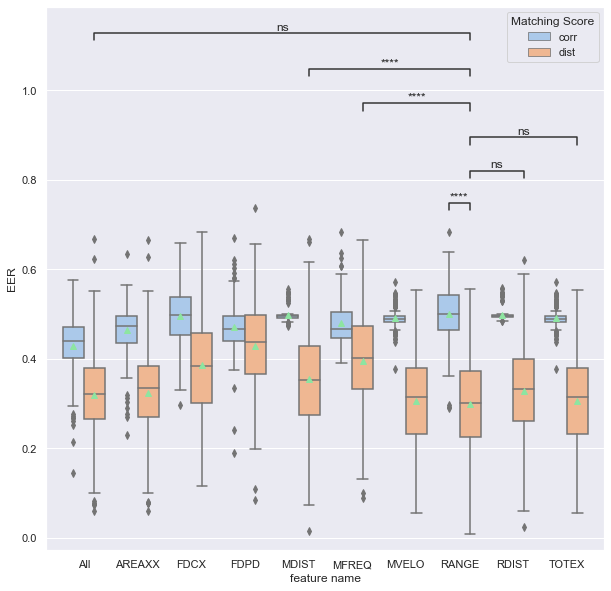

In [279]:
data = df_all_a
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SVM_mobilenet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.308e-02 U_stat=1.548e+04
SVM_vgg16 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.816e+04
SVM_efficientnet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.020e-02 U_stat=1.530e+04
SVM_inception_v3 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.490e-06 U_stat=1.286e+04
SVM_resnet50 v.s. Template_Matching_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.246e-02 U_stat=2.152e+04


(<AxesSubplot:xlabel='clasifier', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x270c8482fd0>])

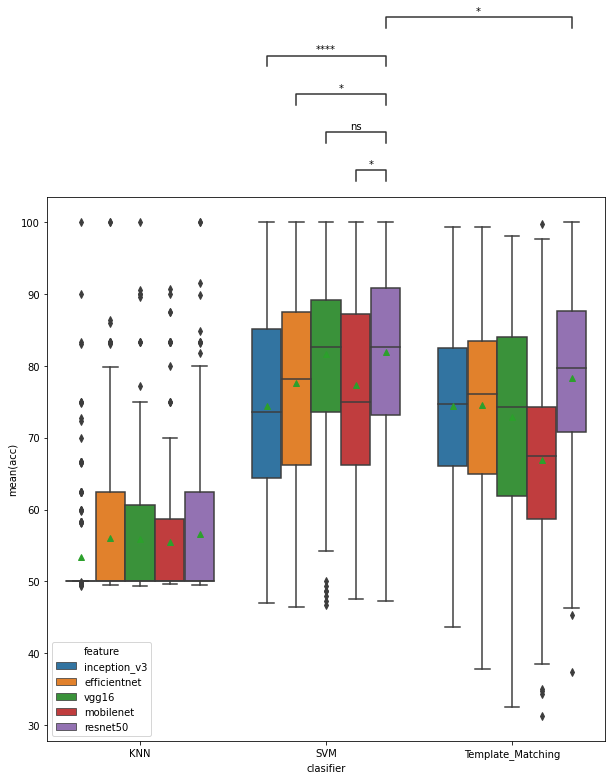

In [48]:
working_path = os.getcwd()

path = os.path.join(working_path[:-5], "Results.xlsx")

df = pd.read_excel(path, index_col = 0)


data = df
hue = "feature"
x = "clasifier"
y = "mean(acc)"
# ["knn_classifier", "svm_classifier", "Template_Matching_classifier"]
# space1=["vgg16.VGG16", "resnet50.ResNet50", "efficientnet.EfficientNetB0"]
box_pairs=[

    # (('Template_Matching','vgg16'),('SVM', 'vgg16')),
    (('Template_Matching','resnet50'),('SVM', 'resnet50')),
    # (('Template_Matching','mobilenet'),('SVM', 'mobilenet')),
    # (('Template_Matching','inception_v3'),('SVM', 'inception_v3')),
    # (('Template_Matching','efficientnet'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'inception_v3')),
    (('SVM','resnet50'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'mobilenet')),
    (('SVM','resnet50'),('SVM', 'vgg16')),
    ]

plt.figure(figsize=(10,10))
# g = sns.catplot(x=x, y=y,
#                  col=hue,
#                 data=data, kind="box",
#                 height=4, aspect=.7)
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [34]:
(df["feature_type"].unique())
(df["clasifier"].unique())
# df.columns[:20]

array(['KNN', 'SVM', 'Template_Matching'], dtype=object)